**Import the Libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




**Load the Dataset**

In [16]:
df=pd.read_csv('/content/netflix_titles (1).csv')

**Preview of the Dataset**

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Other Details about the Dataset**

In [18]:
df.shape

(8807, 12)

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
df.index

RangeIndex(start=0, stop=8807, step=1)

**Checking for missing values**

In [22]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [23]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


*The above cells indicate that there is no duplicate values in the dataset. It contains only null values*

In [24]:
df.shape

(8807, 12)

**Data Cleaning**

In [25]:
df.drop_duplicates(inplace=True) #dropping duplicates

In [26]:
df.shape #No duplicates in the dataset

(8807, 12)

In [27]:
df.dropna(inplace=True) #dropping null values

In [28]:
df.shape #nullvalues were removed

(5332, 12)

In [29]:
df.dropna(subset=['director', 'cast', 'country'],how='any',inplace=True) #drop rows with missing necessary information

In [30]:
df.shape

(5332, 12)

In [31]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed') #convert 'date_added' to datetime

In [32]:
df.head(2) #The values have changed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


**Exploratory Data Analysis(EDA)**

In [33]:
content=df['type'].value_counts()
content

,count
type,
Movie,5185
TV Show,147


Text(0.5, 1.0, 'Types of Content')

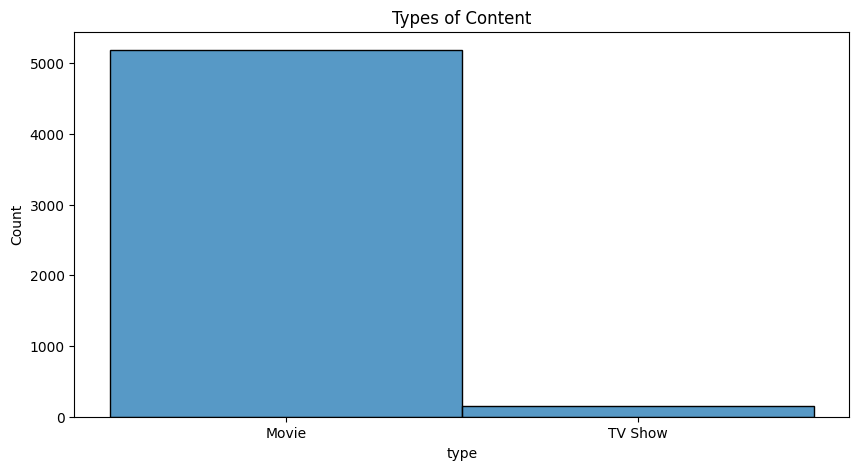

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df,x=df['type'])
plt.title('Types of Content')

Text(0.5, 1.0, 'Content on Netflix')

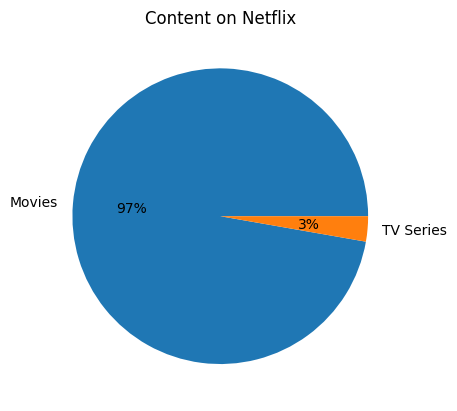

In [35]:
plt.pie(content,labels=['Movies','TV Series'],autopct='%.0f%%')
plt.title('Content on Netflix')

In [36]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [37]:
yr=df['release_year'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
yr

,release_year,count
0,2017,657
1,2018,648
2,2016,577
3,2019,519
4,2020,442
5,2015,349
6,2014,242
7,2013,197
8,2012,163
9,2021,161


Text(0.5, 1.0, 'Top 10 years with the most content releases')

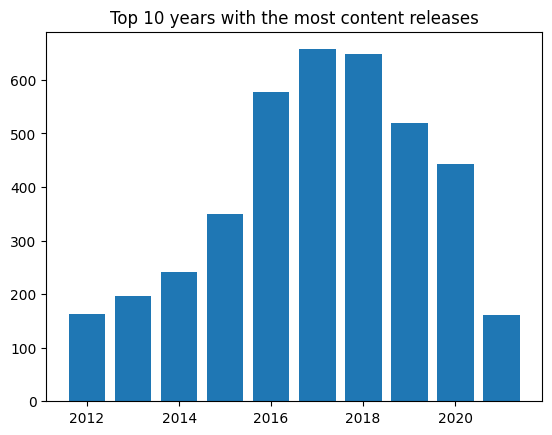

In [38]:
plt.bar(yr['release_year'],yr['count'])
plt.title('Top 10 years with the most content releases')

In [39]:
rv=df['rating'].value_counts()

In [40]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
ratings

,rating,count
0,TV-MA,1822
1,TV-14,1214
2,R,778
3,PG-13,470
4,TV-PG,431
5,PG,275
6,TV-G,84
7,TV-Y7,76
8,TV-Y,76
9,NR,58


Text(0.5, 0.98, 'Ratings on Netflix')

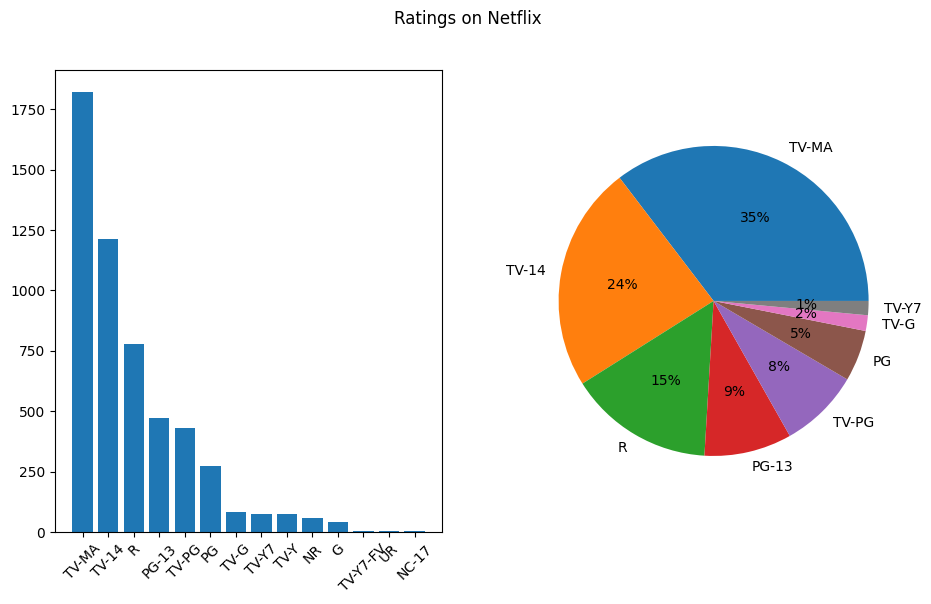

In [41]:
fig,axs=plt.subplots(nrows=1,ncols=2, figsize=(11,6))
axs[1].pie(ratings['count'][:8],autopct='%.0f%%',labels=ratings['rating'][:8])
axs[0].bar(ratings['rating'],ratings['count'])
axs[0].tick_params(axis='x',rotation=45)
plt.suptitle('Ratings on Netflix')


In [42]:
top10countries=df['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
top10countries

,country,count
0,United States,1846
1,India,875
2,United Kingdom,183
3,Canada,107
4,Spain,91
5,Egypt,90
6,Nigeria,88
7,Japan,83
8,Turkey,79
9,Indonesia,76


Text(0.5, 1.0, 'Top 10 countries with most content on Netflix')

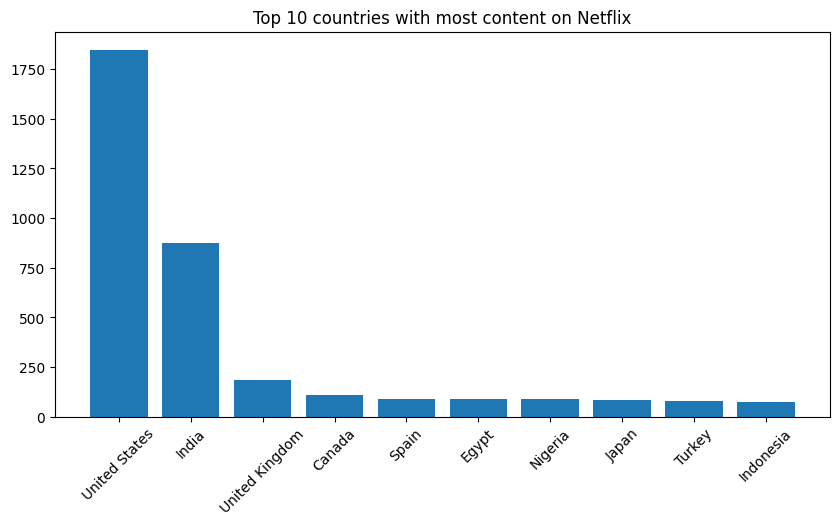

In [43]:
plt.figure(figsize=(10,5))
plt.bar(top10countries['country'],top10countries['count'])
plt.xticks(rotation=45)
plt.title('Top 10 countries with most content on Netflix')

In [44]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

In [45]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24


In [46]:
top10dir=df['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
top10dir

,director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,15
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
5,Youssef Chahine,12
6,Jay Chapman,12
7,Steven Spielberg,11
8,Don Michael Paul,10
9,David Dhawan,9


Text(0.5, 1.0, 'Top 10 directors with most content on Netflix')

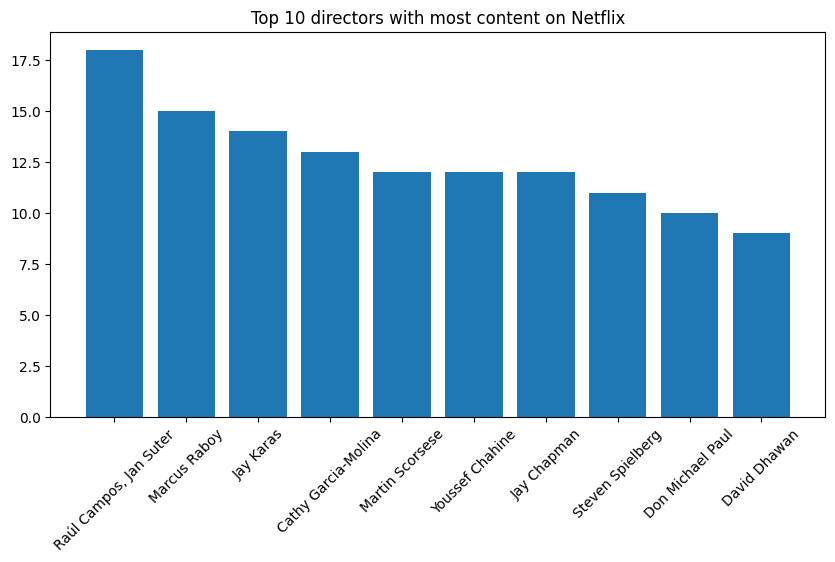

In [47]:
plt.figure(figsize=(10,5))
plt.bar(top10dir['director'],top10dir['count'])
plt.xticks(rotation=45)
plt.title('Top 10 directors with most content on Netflix')

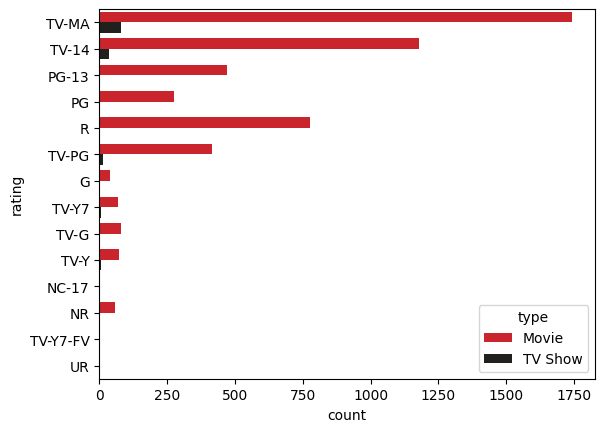

In [48]:
sns.countplot(y="rating", data=df, hue="type", palette=["#E50914","#221F1F"])
plt.show()